In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn import mixture
from sklearn import metrics 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Preprocessed_AFData.xlsx')
d = data.to_numpy()

In [3]:
# of AF cases is 36537
#Splitting the data of AF and non-AF
data_p = np.zeros((36537,30))
data_n = np.zeros(((d.shape[0]-36537),30))
p=0;
n=0;
for i in range(d.shape[0]):
    if d[i,30] == 1:
        data_p[p,:]=d[i,0:30]
        p+=1
    elif d[i,30] == 0:
        data_n[n,:]=d[i,0:30]
        n+=1 
y_p = np.ones((36537,1))
y_n = np.zeros((data_n.shape[0],1)) 

In [4]:
#Creating training,validation and testing data
train_xp, test_xp, train_yp, test_yp = train_test_split(data_p,y_p,test_size=0.2)

#Since the number of non-AF data is large we are randomly selecting instances of non-AF 
#Maintaining a ratio of 0.5 between AF and non-AF data
rdm_in = np.random.choice(data_n.shape[0],size=73200, replace = False)
d_n = data_n[rdm_in,:]
y_n = np.zeros((d_n.shape[0],1))
train_xn, test_xn, train_yn, test_yn = train_test_split(d_n,y_n,test_size=0.2)

train_d = np.vstack((train_xp,train_xn))
train_y = np.vstack((train_yp,train_yn))

t_d = np.vstack((test_xp,test_xn))
t_y = np.vstack((test_yp,test_yn))

valid_d, test_d, valid_y, test_y = train_test_split(t_d,t_y,test_size=0.5)

In [5]:
def classify(model,train_d,train_y,valid_d,valid_y):
    model.fit(train_d,train_y)
    t_AF = 0
    t_NAF = 0
    f_AF = 0
    f_NAF = 0
    y_pred = model.predict(valid_d)
    for i in range(len(valid_y)):
        if valid_y[i] == 0:
            if valid_y[i]==y_pred[i]:
                t_NAF = t_NAF+1
            else:
                f_AF = f_AF+1
        elif valid_y[i] == 1:
            if valid_y[i] == y_pred[i]:
                t_AF = t_AF+1
            else:
                f_NAF = f_NAF+1
                
    print("Confusion Matrix:")            
    print("Predicted\Actual     AF    non-AF")
    print("AF                ",t_AF,"    ",f_AF)
    print("non-AF            ",f_NAF,"   ",t_NAF)
    print("Accuracy:",((t_AF+t_NAF)/len(valid_y)))
    print("Error Rate:",((f_AF+f_NAF)/len(valid_y)),"\n")
    print("Prediction of AF")
    print("-------------------")
    print("Precision:",(t_AF/(t_AF+f_AF)))
    print("Recall:",(t_AF/(t_AF+f_NAF)),"\n")
    print("Prediction of Non-AF")
    print("---------------------")
    print("Precision:",(t_NAF/(t_NAF+f_NAF)))
    print("Recall:",(t_NAF/(t_NAF+f_AF)))

# Neural Network

In [6]:
def nn_activation(x_train,y_train,x_test,y_test):
    error_rate = []
    activation = ['logistic','tanh','relu']
    for i in activation:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,activation=i,learning_rate_init=0.001,
                                             max_iter=20000,shuffle=True)
        model.fit(x_train, y_train)
        print("Activation Function:",i)
        y_pred = model.predict(x_train)
        count=0
        for j in range(len(y_train)):
            if y_train[j] != y_pred[j]:
                count = count+1
        print("Error on Training data:",(count/len(y_train)))
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] != y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
        print("Error on Validation data:",(count/len(y_test)))
        
        
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at %s." % (error_rate[kloc], activation[kloc]))
    return activation[kloc]

In [7]:
def nn_hidden_layer(x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=[30,35,40,45,50,55,60,65,70,75,80,85,90]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=i,activation='relu',
                                             learning_rate_init=0.001,max_iter=20000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] != y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

In [11]:
def nn_hidden_layer_2(x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=[30,35,40,45,50,55,60]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(50,i),activation='relu',
                                             learning_rate_init=0.001,max_iter=20000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] != y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

In [9]:
activation_function = nn_activation(train_d,train_y,valid_d,valid_y) #Relu

Activation Function: logistic
Error on Training data: 0.039367118887332124
Error on Validation data: 0.04182613449972663
Activation Function: tanh
Error on Training data: 0.03763569467700965
Error on Validation data: 0.041188263167486784
Activation Function: relu
Error on Training data: 0.035277768285320484
Error on Validation data: 0.040277018407144156
Lowest error is 0.040277018407144156 occurs at relu.


Lowest error is 0.04009476945507563 occurs at hidden layer size=80.


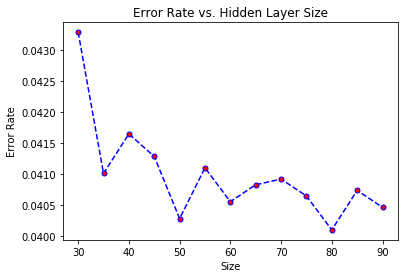

In [10]:
hidden_layer = nn_hidden_layer(train_d,train_y,valid_d,valid_y)
# Although the least error rate occurs at 80 the optimum hidden layer size is chosen as 50 
#as there is no significant decrease in the error rate with additional 30 neurons

Lowest error is 0.0401858939311099 occurs at hidden layer size=30.


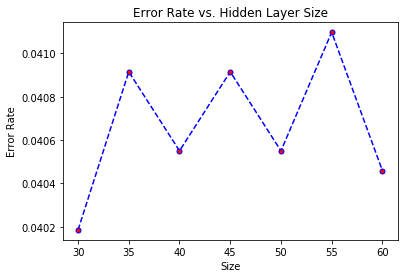

In [12]:
hidden_layer_2 = nn_hidden_layer_2(train_d,train_y,valid_d,valid_y) #no use of second layer

In [13]:
nn_model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=50,activation='relu',
                                        learning_rate_init=0.001,max_iter=20000,shuffle=True)
classify(nn_model,train_d,train_y,test_d,test_y)

Confusion Matrix:
Predicted\Actual     AF    non-AF
AF                 3491      205
non-AF             222     7056
Accuracy: 0.9610898487333698
Error Rate: 0.038910151266630215 

Prediction of AF
-------------------
Precision: 0.9445346320346321
Recall: 0.9402100727174791 

Prediction of Non-AF
---------------------
Precision: 0.9694971145919209
Recall: 0.9717669742459716


# SVM

In [14]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear','sigmoid']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print("Kernel:",i)
        print('Training data accuracy:', metrics.accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print('Validation data accuracy: ', metrics.accuracy_score(y_test,y_pred),'\n')
        rate.append(metrics.accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [15]:
k=svm_kernel(train_d,train_y,valid_d,valid_y)

Kernel: rbf
Training data accuracy: 0.948376220255385
Validation data accuracy:  0.946965554948059 

Kernel: poly
Training data accuracy: 0.6670539589242388
Validation data accuracy:  0.6724075086568252 

Kernel: linear
Training data accuracy: 0.933750242057661
Validation data accuracy:  0.9360306178239475 

Kernel: sigmoid
Training data accuracy: 0.9204797867614394
Validation data accuracy:  0.9243666848915618 

Highest accuracy is 0.946965554948059 occurs at rbf kernel.


In [16]:
svm_model = svm.SVC(kernel='rbf')
classify(svm_model,train_d,train_y,test_d,test_y)

Confusion Matrix:
Predicted\Actual     AF    non-AF
AF                 3391      228
non-AF             322     7033
Accuracy: 0.9498815381811555
Error Rate: 0.050118461818844544 

Prediction of AF
-------------------
Precision: 0.9369991710417243
Recall: 0.9132776730406679 

Prediction of Non-AF
---------------------
Precision: 0.9562202583276682
Recall: 0.9685993664784465


# Decision Tree

[86.40490266 89.61145474 90.62183189 92.18239187 93.04468669 93.61081684
 94.24643179 94.82509198 95.32059825 95.71586417 96.0872091  96.35717459
 96.59410632 96.80939525 96.94494754 97.08163893 97.20693937 97.29351058
 97.38235998 97.44614929]
[86.03973027 89.00127574 90.20411883 92.09950793 92.81027884 93.48459996
 93.97667213 94.14980864 94.65099326 94.89702934 94.99726627 94.96992892
 95.01549116 95.0428285  95.00637871 94.89702934 94.84235466 94.91525424
 94.82412976 94.80590487]


Text(0, 0.5, 'Accuracy [%]')

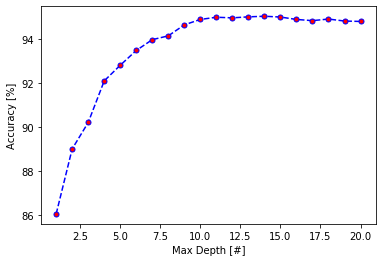

In [36]:
acc_train=[]
acc_test=[]
i=1
while i<=20:
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(train_d,train_y)
    acc_train.append(clf.score(train_d,train_y)*100)
    acc_test.append(clf.score(valid_d,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(1,21),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Max Depth [#]')
plt.ylabel('Accuracy [%]')

In [17]:
dm_model = DecisionTreeClassifier(max_depth=14)
classify(dm_model,train_d,train_y,test_d,test_y)

Confusion Matrix:
Predicted\Actual     AF    non-AF
AF                 3411      238
non-AF             302     7023
Accuracy: 0.950792782941498
Error Rate: 0.049207217058501916 

Prediction of AF
-------------------
Precision: 0.9347766511372979
Recall: 0.9186641529760302 

Prediction of Non-AF
---------------------
Precision: 0.9587713310580205
Recall: 0.9672221457099573


# Feature selection using (Gini) impurity measures

In [20]:
features = dm_model.feature_importances_
top_features_index = np.argsort(features)[::-1]

print("Features in descending order of Gini index:")
print(top_features_index,"\n")
print("Corresponding Gini Indexes:")
print(features[top_features_index])

Features in descending order of Gini index:
[ 3  2  4  1 12  7  6 11  5  8  9 10 13 15 14 16 17  0 18 24 20 19 25 22
 21 27 23 26 28 29] 

Corresponding Gini Indexes:
[5.60562990e-01 1.31988349e-01 8.40688008e-02 4.13101487e-02
 2.90557705e-02 2.30806569e-02 2.00948426e-02 1.97566098e-02
 1.89815251e-02 1.66882620e-02 1.35305537e-02 1.25150250e-02
 7.30298969e-03 5.63136661e-03 5.00342946e-03 3.78622536e-03
 2.43634325e-03 2.20413958e-03 4.15275822e-04 4.06370153e-04
 3.17032206e-04 2.14041920e-04 1.74018743e-04 1.32756913e-04
 1.29470012e-04 9.99480346e-05 5.80335851e-05 5.50244362e-05
 0.00000000e+00 0.00000000e+00]


# Training Decision tree model using the top features

[ 56.05629898  69.25513393  77.662014    81.79302887  84.69860592
  87.00667161  89.01615586  90.99181684  92.88996935  94.55879555
  95.91185092  97.16335342  97.89365239  98.45678905  98.957132
  99.33575453  99.57938886  99.79980282  99.8413304   99.88196742
  99.91367064  99.93507483  99.9524767   99.96575239  99.97869939
  99.9886942   99.99449756 100.         100.         100.        ]


Text(0, 0.5, 'Cummulative V')

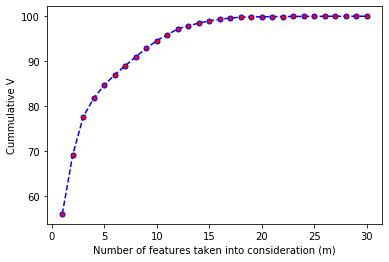

In [39]:
cumulative = np.zeros(features.shape)
s = 0;
for i in range(features.shape[0]):
    s = s + features[top_features_index[i]]
    cumulative[i] = s*100/sum(features)
print(cumulative)
plt.plot(np.arange(1,features.shape[0]+1),cumulative,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Number of features taken into consideration (m)')
plt.ylabel('Cummulative V')

In [24]:
#Selecting features that contribute to 99% 
train_tf = train_d[:,top_features_index[0:15]]
valid_tf = valid_d[:,top_features_index[0:15]]
test_tf = test_d[:,top_features_index[0:15]]

[86.44932736 89.54083086 90.56487715 92.11746346 93.01620932 93.63815512
 94.22478898 94.83420474 95.38210938 95.75687159 96.12138195 96.37426101
 96.58499356 96.75927508 96.94608664 97.08619531 97.21035665 97.32654433
 97.41197644 97.48146123]
[86.51357755 89.74849645 90.72352834 92.50045562 93.11098961 93.49371241
 93.7397485  94.2956078  94.30472025 94.40495717 94.36850738 94.57809368
 94.63276836 94.6783306  94.43229451 94.62365591 94.54164389 94.49608165
 94.4687443  94.41406962]


Text(0, 0.5, 'Accuracy [%]')

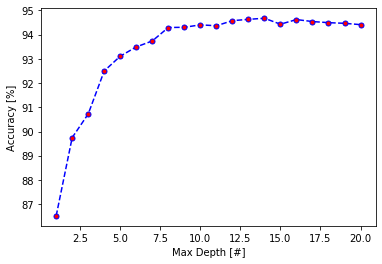

In [25]:
acc_train=[]
acc_test=[]
i=1
while i<=20:
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(train_tf,train_y)
    acc_train.append(clf.score(train_tf,train_y)*100)
    acc_test.append(clf.score(valid_tf,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(1,21),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Max Depth [#]')
plt.ylabel('Accuracy [%]')

In [26]:
dm_model = DecisionTreeClassifier(max_depth=14)
classify(dm_model,train_tf,train_y,test_tf,test_y)

Confusion Matrix:
Predicted\Actual     AF    non-AF
AF                 3401      239
non-AF             312     7022
Accuracy: 0.9497904137051212
Error Rate: 0.0502095862948788 

Prediction of AF
-------------------
Precision: 0.9343406593406594
Recall: 0.9159709130083491 

Prediction of Non-AF
---------------------
Precision: 0.9574584128715571
Recall: 0.9670844236331084


In [27]:
##Selecting features that contribute to 95% 
train_tf1 = train_d[:,top_features_index[0:10]]
valid_tf1 = valid_d[:,top_features_index[0:10]]
test_tf1 = test_d[:,top_features_index[0:10]]

[86.44932736 89.54083086 90.56487715 92.11632437 92.98317557 93.61537322
 94.1325223  94.63600223 95.05291096 95.38894395 95.66118762 95.9322922
 96.15099842 96.37198282 96.57815899 96.77863969 96.93127841 97.10214264
 97.23883402 97.36185627]
[86.51357755 89.74849645 90.72352834 92.46400583 93.08365227 93.40258794
 93.68507381 94.02223437 94.02223437 94.09513395 94.09513395 94.25004556
 94.14980864 94.01312192 93.99489703 93.94933479 93.85821032 93.81264808
 93.85821032 93.70329871]


Text(0, 0.5, 'Accuracy [%]')

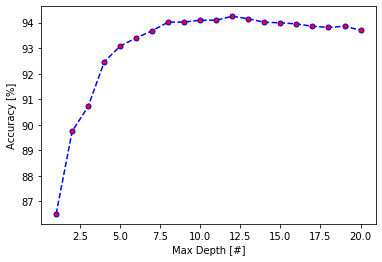

In [28]:
acc_train=[]
acc_test=[]
i=1
while i<=20:
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(train_tf1,train_y)
    acc_train.append(clf.score(train_tf1,train_y)*100)
    acc_test.append(clf.score(valid_tf1,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(1,21),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Max Depth [#]')
plt.ylabel('Accuracy [%]')

In [29]:
dm_model = DecisionTreeClassifier(max_depth=12)
classify(dm_model,train_tf1,train_y,test_tf1,test_y)

Confusion Matrix:
Predicted\Actual     AF    non-AF
AF                 3403      291
non-AF             310     6970
Accuracy: 0.945234189903408
Error Rate: 0.05476581009659195 

Prediction of AF
-------------------
Precision: 0.92122360584732
Recall: 0.9165095610018853 

Prediction of Non-AF
---------------------
Precision: 0.9574175824175825
Recall: 0.9599228756369647


In [30]:
##Selecting features that contribute to 90% 
train_tf2 = train_d[:,top_features_index[0:7]]
valid_tf2 = valid_d[:,top_features_index[0:7]]
test_tf2 = test_d[:,top_features_index[0:7]]

[86.44932736 89.54083086 90.5318434  91.86800169 92.62777797 93.41261434
 93.71675267 94.16327786 94.43779972 94.71687797 95.00392988 95.23060976
 95.50854891 95.72497693 95.96076957 96.23870872 96.45513675 96.63511374
 96.83445534 96.98709406]
[86.51357755 89.74849645 90.70530344 92.10862038 92.68270457 93.15655185
 93.31146346 93.44815017 93.60306178 93.63039913 93.66684892 93.5301622
 93.44815017 93.36613814 93.49371241 93.29323856 93.34791325 93.23856388
 93.10187716 92.81027884]


Text(0, 0.5, 'Accuracy [%]')

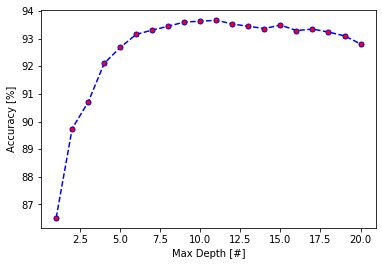

In [31]:
acc_train=[]
acc_test=[]
i=1
while i<=20:
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(train_tf2,train_y)
    acc_train.append(clf.score(train_tf2,train_y)*100)
    acc_test.append(clf.score(valid_tf2,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(1,21),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Max Depth [#]')
plt.ylabel('Accuracy [%]')

In [32]:
dm_model = DecisionTreeClassifier(max_depth=11)
classify(dm_model,train_tf2,train_y,test_tf2,test_y)

Confusion Matrix:
Predicted\Actual     AF    non-AF
AF                 3367      316
non-AF             346     6945
Accuracy: 0.939675596865318
Error Rate: 0.06032440313468197 

Prediction of AF
-------------------
Precision: 0.9142003801248981
Recall: 0.9068138971182332 

Prediction of Non-AF
---------------------
Precision: 0.9525442326155534
Recall: 0.9564798237157416
